In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [33]:
df=pd.read_csv("Netflix Userbase.csv")

In [34]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [35]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [36]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [37]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [38]:
df2=df[df.duplicated(keep=False)]
df2

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration


In [39]:
df3=df.groupby(['Subscription Type']).size()
df3

Subscription Type
Basic       999
Premium     733
Standard    768
dtype: int64

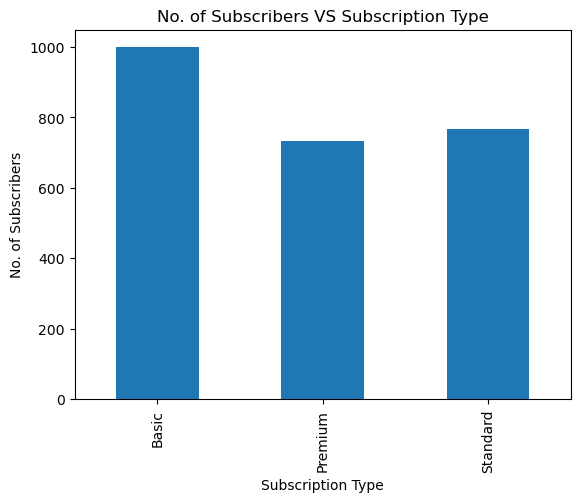

In [40]:
df3.plot(kind="bar")
plt.xlabel('Subscription Type')
plt.ylabel('No. of Subscribers')
plt.title('No. of Subscribers VS Subscription Type')
plt.show()

In [41]:
df4=df.groupby(['Subscription Type','Country']).size()
df4

Subscription Type  Country       
Basic              Australia          31
                   Brazil            146
                   Canada            145
                   France             36
                   Germany           149
                   Italy             176
                   Mexico              4
                   Spain             110
                   United Kingdom      3
                   United States     199
Premium            Australia         101
                   Brazil             33
                   Canada             88
                   France            147
                   Germany             3
                   Italy               4
                   Spain             212
                   United States     145
Standard           Australia          51
                   Brazil              4
                   Canada             84
                   Germany            31
                   Italy               3
                   Mexi

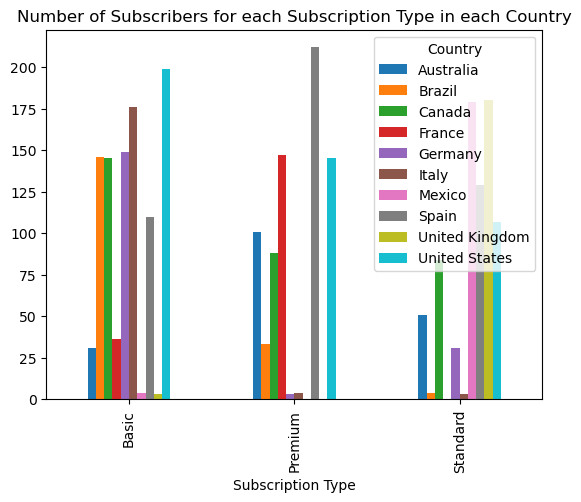

In [42]:
df4.unstack().plot.bar()
plt.title("Number of Subscribers for each Subscription Type in each Country")
plt.show()

In [43]:
df5=df.groupby(['Subscription Type','Monthly Revenue']).sum()
df5

User ID   Age
Subscription Type Monthly Revenue               
Basic             10                167432  6307
                  11                208903  6562
                  12                237338  6874
                  13                221839  6703
                  14                215097  6367
                  15                199851  5977
Premium           10                163848  4966
                  11                125207  3904
                  12                150290  4301
                  13                167446  4948
                  14                169884  5230
                  15                138963  4881
Standard          10                164322  4760
                  11                164080  4630
                  12                183834  6074
                  13                142195  4976
                  14                170900  5150
                  15                134821  4379

<Axes: xlabel='Subscription Type'>

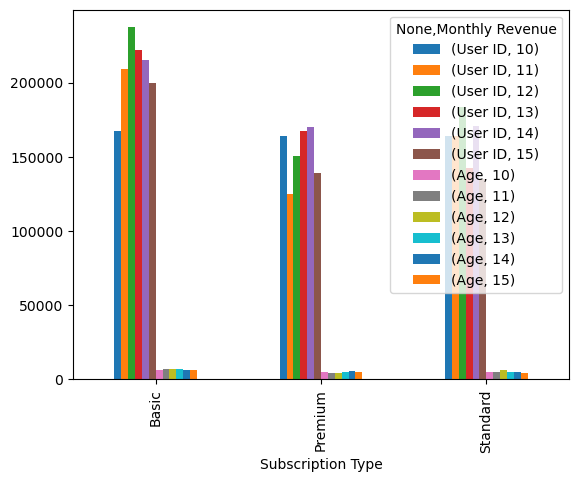

In [44]:
df5.unstack().plot.bar()


Text(0.5, 1.0, 'Monthly Revenue for each Subscription Type')

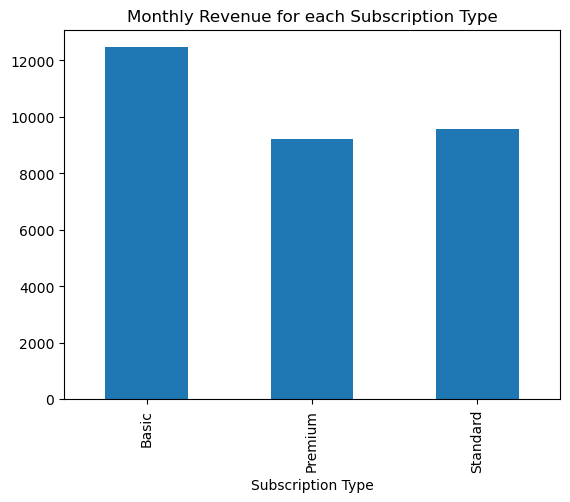

In [45]:
df.groupby(['Subscription Type']).sum()['Monthly Revenue'].plot.bar()
plt.title('Monthly Revenue for each Subscription Type')

In [46]:
df6=df.groupby(['Subscription Type','Age']).sum()
df6

User ID  Monthly Revenue
Subscription Type Age                          
Basic             27     46974              423
                  28     45130              509
                  29     57713              631
                  30     66541              604
                  31     65190              653
...                        ...              ...
Standard          47     51926              459
                  48     52888              425
                  49     26799              345
                  50     30522              278
                  51     37915              404

[76 rows x 2 columns]

In [47]:
df['Gender'].value_counts()

Female    1257
Male      1243
Name: Gender, dtype: int64

In [49]:
df['Age'].value_counts()

39    116
30    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
33     93
51     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: Age, dtype: int64

In [56]:
df.groupby(["Subscription Type", "Age"]).sum()

User ID  Monthly Revenue
Subscription Type Age                          
Basic             27     46974              423
                  28     45130              509
                  29     57713              631
                  30     66541              604
                  31     65190              653
...                        ...              ...
Standard          47     51926              459
                  48     52888              425
                  49     26799              345
                  50     30522              278
                  51     37915              404

[76 rows x 2 columns]

<Axes: ylabel='Gender'>

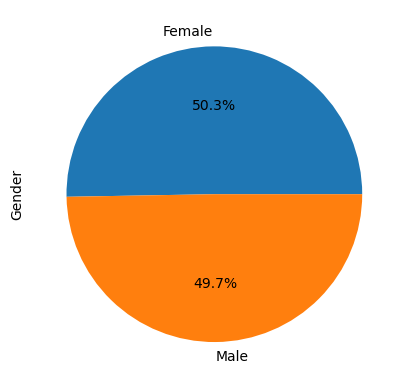

In [66]:
df['Gender'].value_counts().plot(kind='pie',autopct='%0.1f%%')


<Axes: ylabel='Device'>

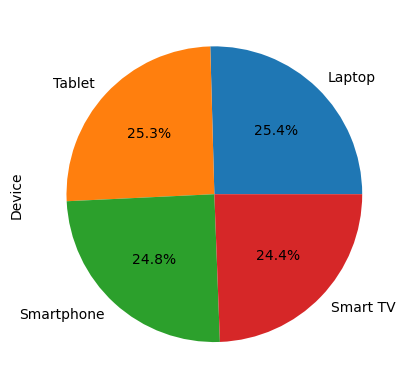

In [74]:
df['Device'].value_counts().plot(kind='pie',autopct='%0.1f%%')